In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# test_signal = "neutral_boson"
# test_signal = "leptoquark"
test_signal = "neutral_Higgs"
# test_signal = "charged_Higgs"
h5file_name = "mlp_lambda_estimator_{}.h5".format(test_signal)
baseline_h5file_name = "baseline_lambda_estimator_{}.h5".format(test_signal)

In [22]:
h5 = pd.HDFStore(h5file_name, "r")
h5_baseline = pd.HDFStore(baseline_h5file_name, "r")
for key in h5.keys():
    print(key)
    print(h5[key])

/lambda_mean_dict
0       0.016119
0.01    0.006776
0.05    0.038423
0.1     0.059774
0.2     0.157836
0.3     0.290189
0.4     0.384685
0.5     0.508988
dtype: float64
/lambda_std_dict
0       0.013219
0.01    0.011618
0.05    0.021871
0.1     0.019451
0.2     0.048774
0.3     0.058422
0.4     0.064259
0.5     0.018774
dtype: float64
/power_df
                 0.00  0.01  0.05  0.10  0.20  0.30  0.40  0.50
LRT Permutation   0.1   0.3   1.0   1.0   1.0   1.0   1.0   1.0
LRT Bootstrap     0.0   0.1   1.0   1.0   1.0   1.0   1.0   1.0
AUC Permutation   0.0   0.2   1.0   1.0   1.0   1.0   1.0   1.0
AUC Bootstrap     0.0   0.2   1.0   1.0   1.0   1.0   1.0   1.0
MCE Permutation   0.2   0.4   1.0   1.0   1.0   1.0   1.0   1.0
MCE Bootstrap     0.3   0.4   1.0   1.0   1.0   1.0   1.0   1.0


In [23]:
def plot_lambda(lambda_mean_dict, lambda_std_dict, signal):
    x = np.array([float(key) for key in lambda_mean_dict.keys()])
    y = np.array([lambda_mean_dict[key] for key in lambda_mean_dict.keys()])
    yerr = np.array([lambda_std_dict[key] for key in lambda_std_dict.keys()])
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='black', ecolor='lightgray', elinewidth=3)
    true_x = np.linspace(0, np.max(x), 10)
    plt.plot(true_x, true_x, '--')
    plt.xlabel("True Lambda")
    plt.ylabel("Estimated Lambda")
    plt.title("Estimated λ vs True λ for {}".format(signal))
    plt.show()

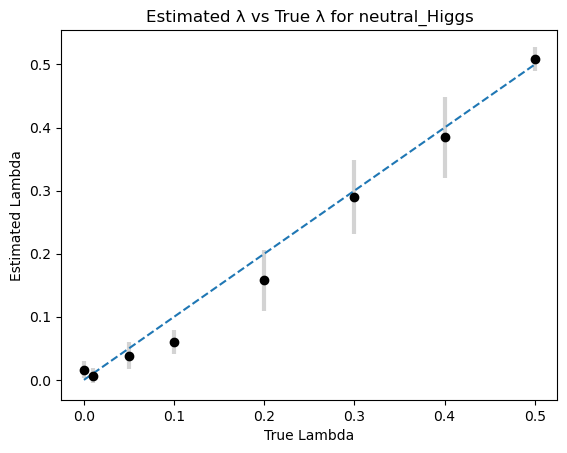

In [24]:
plot_lambda(h5["lambda_mean_dict"].to_dict(), h5["lambda_std_dict"].to_dict(), test_signal)

In [25]:
def plot_lambda_with_baseline(lambda_mean_dict, lambda_std_dict, baseline_mean_dict, baseline_std_dict, signal):
    x_baseline = np.array([float(key) for key in baseline_mean_dict.keys()])
    y_baseline = np.array([baseline_mean_dict[key] for key in baseline_mean_dict.keys()])
    yerr_baseline = np.array([baseline_std_dict[key] for key in baseline_std_dict.keys()])
    plt.plot(x_baseline, y_baseline, label="Baseline")
    plt.fill_between(x_baseline, y_baseline-yerr_baseline, y_baseline+yerr_baseline)
    x = np.array([float(key) for key in lambda_mean_dict.keys()])
    y = np.array([lambda_mean_dict[key] for key in lambda_mean_dict.keys()])
    yerr = np.array([lambda_std_dict[key] for key in lambda_std_dict.keys()])
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='black', ecolor='lightgray', elinewidth=3, label="Embedding")
    true_x = np.linspace(0, np.max(x), 10)
    plt.plot(true_x, true_x, '--')
    plt.xlabel("True Lambda")
    plt.ylabel("Estimated Lambda")
    plt.title("Estimated λ vs True λ for {}".format(signal))
    plt.legend()
    plt.show()

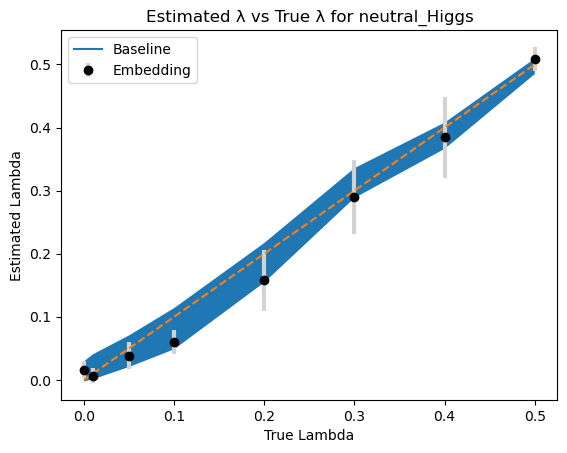

In [26]:
plot_lambda_with_baseline(h5["lambda_mean_dict"].to_dict(), h5["lambda_std_dict"].to_dict(), h5_baseline["lambda_mean_dict"].to_dict(), h5_baseline["lambda_std_dict"].to_dict(), test_signal)